In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LogisticRegression
from scipy.special import expit # this is the logistic sigmoid function
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#%% 2a) Loader
dt = pd.read_csv('theData.csv',header=None)
art = pd.read_csv('theArt.csv')

In [291]:
from scipy.stats import ttest_ind
N_Number=11994217
# Generate two samples
np.random.seed(N_Number)

In [292]:
#find numbers of na in each column of the dataset
for column in dt.columns:
    nan_count = dt[column].isna().sum()
    if nan_count > 0:
        print(f"Column '{column}' contains {nan_count} NaN values.")

Column '182' contains 2 NaN values.
Column '183' contains 3 NaN values.
Column '184' contains 4 NaN values.
Column '185' contains 4 NaN values.
Column '186' contains 7 NaN values.
Column '187' contains 3 NaN values.
Column '188' contains 2 NaN values.
Column '189' contains 2 NaN values.
Column '190' contains 5 NaN values.
Column '191' contains 2 NaN values.
Column '192' contains 4 NaN values.
Column '193' contains 6 NaN values.
Column '194' contains 3 NaN values.
Column '195' contains 2 NaN values.
Column '196' contains 3 NaN values.
Column '197' contains 3 NaN values.
Column '198' contains 4 NaN values.
Column '199' contains 3 NaN values.
Column '200' contains 5 NaN values.
Column '201' contains 4 NaN values.
Column '202' contains 2 NaN values.
Column '203' contains 2 NaN values.
Column '204' contains 5 NaN values.
Column '205' contains 6 NaN values.
Column '206' contains 3 NaN values.
Column '207' contains 6 NaN values.
Column '208' contains 4 NaN values.
Column '209' contains 3 NaN 

since the missing values are mainly after 182, i will implement relevant removal for each questions.

## 1. Is classical art more well liked than modern art?

In [293]:
#H0: classical art is similarly liked than modern art
#H1: classical art is more liked than modern art


#separate out the preferences dataset
preferences= dt.iloc[:,:91]

In [294]:
#store numbers of paintings in each arrays for classic and modern arts so that I can separate out the arts based on the index
classic_arr = np.where(art.iloc[:, 5] == 1)[0]
modern_arr=np.where(art.iloc[:, 5] == 2)[0]

Text(0, 0.5, 'Frequency')

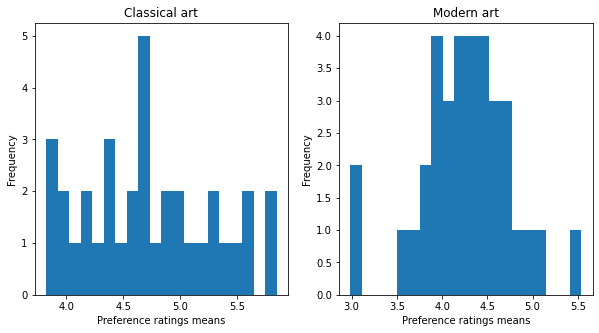

In [295]:
classic=pd.DataFrame()
modern=pd.DataFrame()

#loop through each column
#if name equals to items in the array
#slice the column into the new dataset
for i in preferences.columns:
    if i in classic_arr:
        classic = pd.concat([classic, preferences[i]], axis=1)
    if i in modern_arr:
        modern = pd.concat([modern, preferences[i]], axis=1)

#transform classic and modern means to numpy arrays
classic_mean=classic.mean().to_numpy()
modern_mean=modern.mean().to_numpy()

#see if classic and modern are normally distributed  
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the histograms on each subplot
axs[0].hist(classic_mean, bins=20)
axs[1].hist(modern_mean, bins=20)

# Add titles and labels to each subplot
axs[0].set_title('Classical art')
axs[1].set_title('Modern art')
axs[0].set_xlabel('Preference ratings means')
axs[1].set_xlabel('Preference ratings means')
axs[0].set_ylabel('Frequency')
axs[1].set_ylabel('Frequency')

In [296]:
#since the distribution is not normal, I will be using the Mann Whitman u test to test the significance

stat, pv = mannwhitneyu(classic_mean, modern_mean)
print("The U statistics is", stat,"The p-value is",pv)

# Interpret the results
if pv < 0.05:
    if classic_mean.mean() > modern_mean.mean():
        print("Classic art has significantly higher preference ratings than modern arts.")
    if modern_mean.mean() > classic_mean.mean():
        print("Modern art has significantly higher preference ratings than classic art.")
else:
    print("There is no significant difference between the preference ratings among modern and non-human art")

The U statistics is 894.0 The p-value is 0.0009643070574500392
Classic art has significantly higher preference ratings than modern arts.


## 2. Is there a difference in the preference ratings for modern art vs. non-human (animals and computers) generated art? 

Text(0.5, 1.0, 'Non-human generated arts')

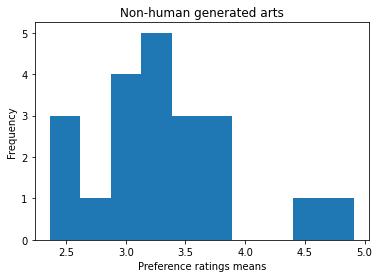

In [297]:
#H0: There is no difference in the preference ratings for modern art vs. non-human (animals and computers) generated art
#H1: There is a difference in the preference ratings for modern art vs. non-human (animals and computers) generated art

#create an array that contains the index to loop through
non_human_arr=np.where(art.iloc[:, 5] == 3)[0]

#separate 
non_human=pd.DataFrame()
for i in preferences.columns:
    if i in non_human_arr:
        non_human = pd.concat([non_human, preferences[i]], axis=1)

non_human_mean=non_human.mean().to_numpy()
plt.hist(non_human_mean)
plt.xlabel('Preference ratings means')
plt.ylabel('Frequency')
plt.title('Non-human generated arts')

In [298]:
#since the distribution is also not normally distirbuted, i will still be using the mann whitney u test

stat2, pv2 = mannwhitneyu(modern_mean,non_human_mean)
print("The U statistics is", stat2, "The p-value is",pv2)
# Interpret the results
if pv2 < 0.05:
    print("There is a significant difference between the preference ratings among modern and non-human art")
else:
    print("There is no significant difference between the preference ratings among modern and non-human art")

The U statistics is 644.0 The p-value is 2.995997764824167e-06
There is a significant difference between the preference ratings among modern and non-human art


## 3. Do women give higher art preference ratings than men?

Text(0, 0.5, 'Frequency')

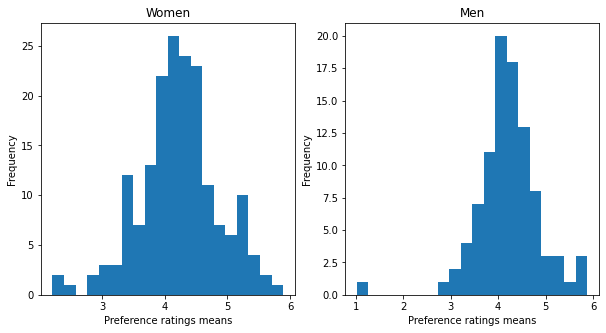

In [299]:
#dt[216]: 1(male) or 2(female)

#H0: There is no difference in art preference ratings between women and men
#H1: Women give higher art preference ratings than men

#remove na values
men=dt[dt.iloc[:,216] == 1]
men=men.iloc[:,:91].to_numpy()

women=dt[dt.iloc[:,216] == 2]
women=women.iloc[:,:91].to_numpy()


men_mean = np.nanmean(men,axis=1)
women_mean = np.nanmean(women,axis=1)

# Plot the histograms on each subplot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].hist(women_mean, bins=20)
axs[1].hist(men_mean, bins=20)

# Add titles and labels to each subplot
axs[0].set_title('Women')
axs[1].set_title('Men')
axs[0].set_xlabel('Preference ratings means')
axs[1].set_xlabel('Preference ratings means')
axs[0].set_ylabel('Frequency')
axs[1].set_ylabel('Frequency')

In [300]:
#significance test using independent t-test since the distribution is normally distributed
t_stat, p_value = ttest_ind(men_mean, women_mean)
print("The t statistics is", t_stat, "The p-value is",p_value)
# Interpret the results
if p_value < 0.05:
    if men_mean.mean() > women_mean.mean():
        print("Men give higher preference ratings than women.")
    if women_mean.mean() > men_mean.mean():
        print("Women give higher preference ratings than men.")
else:
    print("There is no significant difference between the preference ratings among women and men")

The t statistics is -0.1378782526747258 The p-value is 0.890438650804795
There is no significant difference between the preference ratings among women and men


## 4. Is there a difference in the preference ratings of users with some art background (some art education) vs. none? 

Text(0, 0.5, 'Frequency')

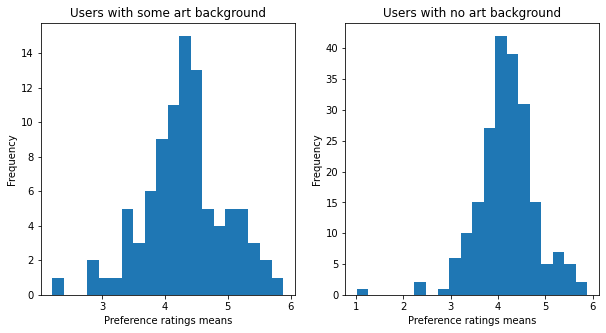

In [301]:
#dt[218]: 0 or >0

#two-tailed, non-directional
#H0: There is no difference in the preference ratings of users with some art background (some art education) vs. none.
#H1: There is a difference in the preference ratings of users with some art background (some art education) vs. none.
artsy=dt[dt.iloc[:,218] == 0]
artsy=artsy.iloc[:,:91].to_numpy()

nonart=dt[dt.iloc[:,218] != 0]
nonart=nonart.iloc[:,:91].to_numpy()


artsy_mean=np.nanmean(artsy,axis=1)
nonart_mean=np.nanmean(nonart,axis=1)

# Plot the histograms on each subplot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].hist(artsy_mean, bins=20)
axs[1].hist(nonart_mean, bins=20)

# Add titles and labels to each subplot
axs[0].set_title('Users with some art background')
axs[1].set_title('Users with no art background')
axs[0].set_xlabel('Preference ratings means')
axs[1].set_xlabel('Preference ratings means')
axs[0].set_ylabel('Frequency')
axs[1].set_ylabel('Frequency')

In [302]:
#The histograms show normal distributions of both groups, hence I will be using the t-test for independent groups to test the significance difference

t_art, p_art = ttest_ind(artsy_mean, nonart_mean)
print("The t statistics is", t_art, "The p-value is",p_art)
# Interpret the results
if p_value < 0.05:
    print("There is a significant difference between the preference ratings among users with some art background versus none")
else:
    print("There is no significant difference between the preference ratings among users with some art background versus none")

The t statistics is 1.4862916486925262 The p-value is 0.13825918475836102
There is no significant difference between the preference ratings among users with some art background versus none


## 5. Build a regression model to predict art preference ratings from energy ratings only. Make sure to use cross-validation methods to avoid overfitting and characterize how well your model predicts art preference ratings.

In [303]:
#linear regression since there is only one variable predicting the other

In [381]:
#means of each user’s energy ratings
energy=dt.iloc[:, 92:182]
r_energy=np.mean(energy, axis=1)
x=np.array(r_energy).reshape(len(preferences),1)

#means of each user’s preference ratings
r_preferences=np.mean(preferences, axis=1)
y=np.array(r_preferences)

300


In [382]:
#cross-validation train test splits
xTrain, xTest , yTrain, yTest = train_test_split(x,y, test_size=0.5, random_state=N_Number)
model = LinearRegression()
model.fit(xTrain,yTrain)

intercept=model.intercept_
slope= model.coef_
print("The intercept is:", intercept, "The slope is:", slope)

y_pred = model.predict(xTest)

#rmse
rmseSingle=np.sqrt(np.mean((y_pred.reshape((-1,1))-yTest)**2))
print("The RMSE of the model is:", rmseSingle)

#rsqr 
rSqrSingle = r2_score(yTest,y_pred)
print("The R-squared of the model is:", rSqrSingle)

The intercept is: 1.8831603043539769 The slope is: [0.58012863]
The RMSE of the model is: 0.6747446230904848
The R-squared of the model is: 0.05236539424859743


Text(0.5, 1.0, 'R^2 = 0.052')

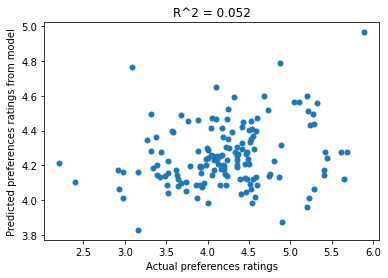

In [385]:
#predicted vs. actual of the model
plt.plot(yTest,y_pred,'o',markersize=5)
plt.xlabel('Actual preferences ratings') 
plt.ylabel('Predicted preferences ratings from model')  
plt.title('R^2 = {:.3f}'.format(rSqrSingle))

## 6. Build a regression model to predict art preference ratings from energy ratings and demographic information. Make sure to use cross-validation methods to avoid overfitting and comment on how well your model predicts relative to the “energy ratings only” model.

In [368]:
#multiple regression
#demographic information: age, gender
#remove na values on only the age and gender column 

age=dt.iloc[:, 215]
gender=dt.iloc[:, 216]
#remove the index of r_energy and r_preferences where age and gender has na value
Xy_na=np.column_stack((r_energy,age,gender,r_preferences))
mask = ~np.isnan(Xy_na).any(axis=1)
X_y = Xy_na[mask]

X=X_y[:, :3]
y2=X_y[:,-1]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y2, test_size=0.5, random_state=N_Number)
fullmodel = LinearRegression()
fullmodel.fit(X_train1,y_train1)

fullintercept=fullmodel.intercept_
fullslope=fullmodel.coef_
print("The intercept is:", fullintercept, "The slope is:",fullslope)

y_pred_full = fullmodel.predict(X_test1)

#rmse
rmseFull=np.sqrt(np.mean((y_pred_full.reshape((-1,1))-y_test1)**2))
print("The RMSE of the model is:", rmseFull)

rSqrFull=r2_score(y_test1,y_pred_full)
print("The R-squared of the model is:", rSqrFull)

The intercept is: 3.453580176481383 The slope is: [ 0.51593946 -0.06606854 -0.04594377]
The RMSE of the model is: 0.7059413921740698
The R-squared of the model is: 0.16029512149519431


Text(0.5, 1.0, 'R^2 = 0.160')

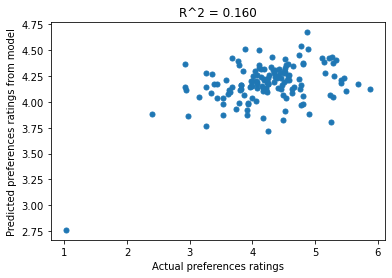

In [374]:
plt.plot(y_test,y_pred_full,'o',markersize=5)
plt.xlabel('Actual preferences ratings') 
plt.ylabel('Predicted preferences ratings from model')  
plt.title('R^2 = {:.3f}'.format(rSqrFull))

## 7. Considering the 2D space of average preference ratings vs. average energy rating (that contains the 91 art pieces as elements), how many clusters can you – algorithmically - identify in this space? Make sure to comment on the identity of the clusters – do they correspond to particular types of art?

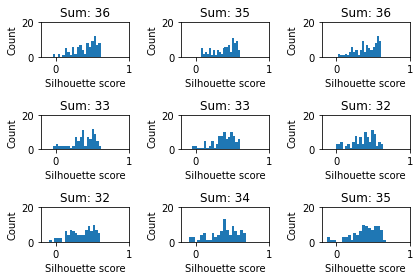

In [390]:
#putting the means of energy and preferences into one dataset
energy=dt.iloc[:,91:182]
e_mean=np.nanmean(energy,axis=0)
preferences_np= dt.iloc[:,:91].to_numpy()
p_mean=np.nanmean(preferences_np,axis=0)
p_e=np.column_stack((p_mean,e_mean))


#set the kmeans clusters to be 9 clusters
numClusters = 9 
sSum = np.empty([numClusters,1])*np.NaN

for ii in range(2, numClusters+2): 
    kMeans = KMeans(n_clusters = int(ii),random_state= N_Number).fit(p_e) 
    cId = kMeans.labels_ 
    cCoords = kMeans.cluster_centers_ 
    s = silhouette_samples(p_e,cId) 
    sSum[ii-2] = sum(s) 
    # Plot data:
    plt.subplot(3,3,ii-1) 
    plt.hist(s,bins=20) 
    plt.xlim(-0.2,1)
    plt.ylim(0,20)
    plt.xlabel('Silhouette score')
    plt.ylabel('Count')
    plt.title('Sum: {}'.format(int(sSum[ii-2]))) 
    plt.tight_layout() 

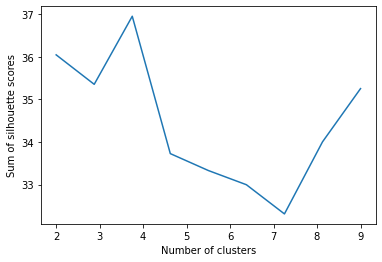

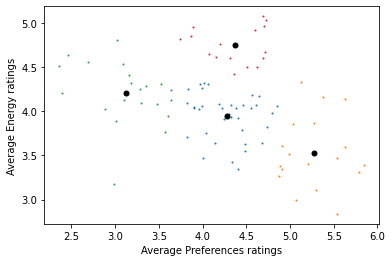

In [391]:
plt.plot(np.linspace(2,numClusters,9),sSum)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')
plt.show()

#numbers of clusters are 4
numClusters = 4
kMeans = KMeans(n_clusters = numClusters).fit(p_e) 
cId = kMeans.labels_ 
cCoords = kMeans.cluster_centers_ 

# Plot the color-coded data:
for ii in range(numClusters):
    plotIndex = np.argwhere(cId == int(ii))
    plt.plot(p_e[plotIndex,0],p_e[plotIndex,1],'o',markersize=1)
    plt.plot(cCoords[int(ii-1),0],cCoords[int(ii-1),1],'o',markersize=5,color='black')  
    plt.xlabel('Average Preferences ratings')
    plt.ylabel('Average Energy ratings')

In [392]:
#I will put the clusters 

cluster=art.iloc[:,3:8]
cluster['Cluster'] = cId

cluster_1 = cluster[cluster['Cluster'] == 0]
print("Cluster 1 contains mostly any of the followings:", cluster_1.iloc[:, 0].mode()[0],cluster_1.iloc[:, 1].mode()[0],cluster_1.iloc[:, 2].mode()[0],cluster_1.iloc[:, 3].mode()[0],cluster_1.iloc[:, 4].mode()[0])
cluster_2 = cluster[cluster['Cluster'] == 1]
print("Cluster 2 contains mostly any of the followings:",cluster_2.iloc[:, 0].mode()[0],cluster_2.iloc[:, 1].mode()[0],cluster_2.iloc[:, 2].mode()[0],cluster_2.iloc[:, 3].mode()[0],cluster_2.iloc[:, 4].mode()[0])
cluster_3 = cluster[cluster['Cluster'] == 2]
print("Cluster 3 contains mostly any of the followings:",cluster_3.iloc[:, 0].mode()[0],cluster_3.iloc[:, 1].mode()[0],cluster_3.iloc[:, 2].mode()[0],cluster_3.iloc[:, 3].mode()[0],cluster_3.iloc[:, 4].mode()[0])
cluster_4 = cluster[cluster['Cluster'] == 3]
print("Cluster 4 contains mostly any of the followings:",cluster_4.iloc[:, 0].mode()[0],cluster_4.iloc[:, 1].mode()[0],cluster_4.iloc[:, 2].mode()[0],cluster_4.iloc[:, 3].mode()[0],cluster_4.iloc[:, 4].mode()[0])

Cluster 1 contains mostly any of the followings: Abstract Expressionism 1925 2 0 1
Cluster 2 contains mostly any of the followings: Neoclassical 1500 1 0 1
Cluster 3 contains mostly any of the followings: Abstract 2017 3 1 0
Cluster 4 contains mostly any of the followings: Rococo 1635 2 0 1


## 8. Considering only the first principal component of the self-image ratings as inputs to a regression model – how well can you predict art preference ratings from that factor alone?

In [394]:
from sklearn.metrics import mean_squared_error
#put self image and preferences into one dataset

self_dt = dt.iloc[:,205:215]
self_preference_na=np.column_stack((self_dt,preferences))
mask_self = ~np.isnan(self_preference_na).any(axis=1)
self_preference = self_preference_na[mask_self]

self=self_preference[:, :10]
preferences_self=self_preference[:, 10:]

286


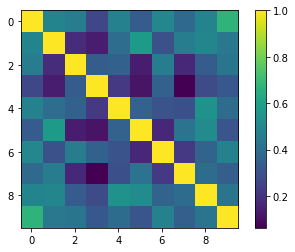

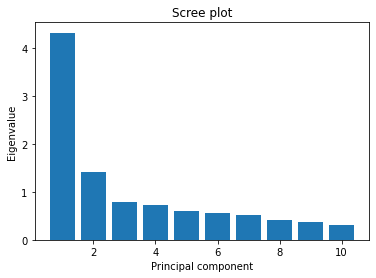

The RMSE of the model is: 0.6747446230904848
The R-squared of the model is: 0.05236539424859743


Text(0.5, 1.0, 'First Principal component vs. actual preference ratings')

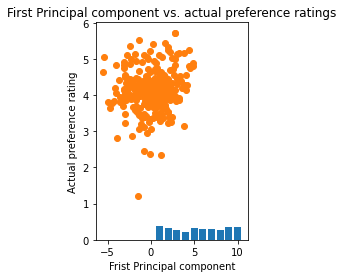

In [393]:
#graph the correlation matrix

r_self = np.corrcoef(self, rowvar=False)
plt.imshow(r_self) 
plt.colorbar()
plt.show()

corr_self = np.corrcoef(r_self, rowvar=False)


#further, I am going to transform the data and use scree plot to determine the principle components
z_self = stats.zscore(self)
pca_self = PCA().fit(z_self)
eigVals_self = pca_self.explained_variance_
loadings_self = pca_self.components_*-1
orig_self = pca_self.fit_transform(z_self)*-1

#numbers of predictors is 10 since there are 10 variables in the dataset
numPredictors = 10
plt.bar(np.linspace(1,numPredictors,numPredictors),eigVals_self)
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.title('Scree plot')
plt.show()

plt.subplot(1,2,1) # Factor 1: 
plt.bar(np.linspace(1,numPredictors,numPredictors),loadings_self[0,:])
plt.title('first principle component')


#conduct regression model on first principal component
self_pc1=orig_self[:,0].reshape((-1, 1))
y_self= self_preference.mean(axis=1)
self_df = pd.DataFrame({'X': self_pc1.flatten(), 'y': y_self})


x = self_df[['X']].values.reshape(-1, 1)
y = self_df['y'].values.reshape(-1, 1)

reg = LinearRegression()
reg.fit(x, y)
self_pred = reg.predict(x)

#rmse
rmse_self=np.sqrt(np.mean((self_pred.reshape((-1,1))-y)**2))
print("The RMSE of the model is:", rmseSingle)

#rsqr
r_self = model.score(x,y)
print("The R-squared of the model is:", rSqrSingle)

## 9. Consider the first 3 principal components of the “dark personality” traits – use these as inputs to a regression model to predict art preference ratings. Which of these components significantly predict art preference ratings? Comment on the likely identity of these factors (e.g. narcissism, manipulativeness, callousness, etc.).

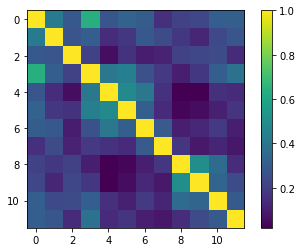

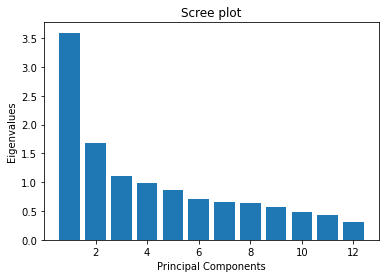

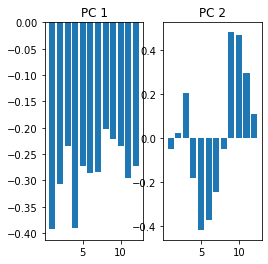

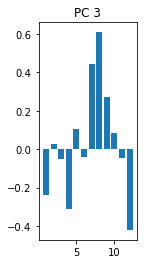

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     6.590
Date:                Fri, 12 May 2023   Prob (F-statistic):           0.000256
Time:                        03:35:07   Log-Likelihood:                -233.66
No. Observations:                 284   AIC:                             475.3
Df Residuals:                     280   BIC:                             489.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0769      0.033    123.834      0.0

In [395]:
import statsmodels.api as sm

dark_dt = dt.iloc[:,182:194]
dark_preference_na=np.column_stack((dark_dt,preferences))
mask_dark = ~np.isnan(dark_preference_na).any(axis=1)
dark_preference = dark_preference_na[mask_dark]

dark=dark_preference[:, :12]
preferences_dark=dark_preference[:, 12:]

r_dark = np.corrcoef(dark, rowvar=False)
plt.imshow(r_dark) 
plt.colorbar()
plt.show()


z_dark = stats.zscore(dark)
pca_dark = PCA().fit(z_dark)
eigVals_dark = pca_dark.explained_variance_
loadings_dark = pca_dark.components_*-1
orig_dark = pca_dark.fit_transform(z_dark)*-1

numPredictors = 12
plt.bar(np.linspace(1,numPredictors,numPredictors),eigVals_dark)
plt.title('Scree plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.show()


plt.subplot(1,3,1) # Factor 1: 
plt.bar(np.linspace(1,numPredictors,numPredictors),loadings_dark[0,:]) 
plt.title('PC 1')
#factor 1: lowest in first and fourth, manipulate
#least likely to manipulate others-->predict art preferences


plt.subplot(1,3,2) # Factor 2:
plt.bar(np.linspace(1,numPredictors,numPredictors),loadings_dark[1,:]) 
plt.title('PC 2')
plt.show()
#factor 2: highest in question 9,10 (want others to admire), lowest in 5, 6(lack remorse, unconcerned)
#narcissism

plt.subplot(1,3,3) # Factor 3:
plt.bar(np.linspace(1,numPredictors,numPredictors),loadings_dark[2,:])
plt.title('PC 3')
plt.show()
#factor 3: highest in question 7,8, cynical and want others to admire
#callous


#which of the components significantly predict art preference ratings
#use as inputs to a regression model to predict art preferences
first=orig_dark[:,0].reshape((-1,1))
second=orig_dark[:,1].reshape((-1,1))
third=orig_dark[:,2].reshape((-1,1))


y_dark= dark_preference.mean(axis=1)

pcdark=np.column_stack((first,second,third))

dark_model=sm.OLS(y_dark,sm.add_constant(pcdark[:, :3]))
result=dark_model.fit()
print(result.summary())
#only the second pc is signficant   

## 10. Can you determine the political orientation of the users (to simplify things and avoid gross class imbalance issues, you can consider just 2 classes: “left” (progressive & liberal) vs. “nonleft” (everyone else)) from all the other information available, using any classification model of your choice? Make sure to comment on the classification quality of this model. 

In [ ]:
#change the dt column label to 1 and 0 instead of 2 or non 2
df=dt.copy()
df=df.dropna()

info = df.drop(df.columns[[217]], axis=1)
politics = np.where(df.iloc[:,217].isin([2,1]), 1, 0)

#since a lot of info might be correlated itself, I will reduce each information categories into means of an individual
means_1 = pd.DataFrame(np.mean(info.iloc[:, :91], axis=1))
means_2 = pd.DataFrame(np.mean(info.iloc[:, 91:182], axis=1))
means_3 = pd.DataFrame(np.mean(info.iloc[:, 182:194], axis=1))
means_4 = pd.DataFrame(np.mean(info.iloc[:, 194:205], axis=1))
means_5 = pd.DataFrame(np.mean(info.iloc[:, 205:215], axis=1))
means_6 = info.iloc[:, 215]
means_7 = info.iloc[:, 216]
means_8 = info.iloc[:, 217]
means_9 = info.iloc[:, 218]
means_10 = info.iloc[:, 219]

# concatenate the two DataFrames
info_c = pd.concat([means_1, means_2,means_3, means_4,means_5, means_6,means_7, means_8,means_9, means_10], axis=1)

#if the components are related with each other
corr_matrix = info_c.corr()
corr_matrix

,0,0,0,0,0,215,216,218,219,220
0,1.000000,0.341498,0.006588,0.229027,-0.009137,-0.101765,0.041552,-0.075147,-0.054188,0.038588
0,0.341498,1.000000,0.118743,0.191698,0.031392,0.159496,0.013678,-0.089361,-0.002061,0.049616
0,0.006588,0.118743,1.000000,0.136096,-0.119930,0.083865,-0.114610,-0.040071,0.048499,0.037228
0,0.229027,0.191698,0.136096,1.000000,0.068257,0.055102,-0.052197,-0.014880,0.098931,0.080237
0,-0.009137,0.031392,-0.119930,0.068257,1.000000,0.128735,-0.053799,0.035142,0.013167,0.010832
215,-0.101765,0.159496,0.083865,0.055102,0.128735,1.000000,-0.121819,-0.022349,0.081834,-0.055918
216,0.041552,0.013678,-0.114610,-0.052197,-0.053799,-0.121819,1.000000,0.062404,0.085199,0.101008
218,-0.075147,-0.089361,-0.040071,-0.014880,0.035142,-0.022349,0.062404,1.000000,0.151801,0.348321
219,-0.054188,-0.002061,0.048499,0.098931,0.013167,0.081834,0.085199,0.151801,1.000000,-0.031968
220,0.038588,0.049616,0.037228,0.080237,0.010832,-0.055918,0.101008,0.348321,-0.031968,1.000000


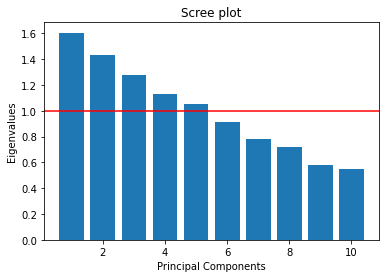

Numbers of principal components: 5


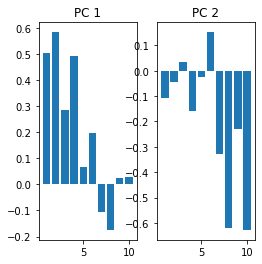

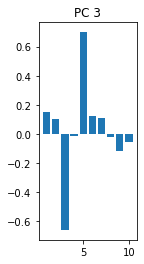

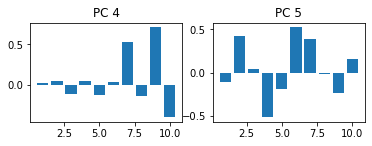

In [ ]:
info_m=info_c.to_numpy()
z_info = stats.zscore(info_m)
pca_info = PCA().fit(z_info)
eigVals_info = pca_info.explained_variance_
loadings_info = pca_info.components_*-1
origData_info = pca_info.fit_transform(z_info)*-1

numPredictors = 10
plt.bar(np.linspace(1,numPredictors,numPredictors),eigVals_info)
plt.title('Scree plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.axhline(y=1, color='r', linestyle='-')
plt.show()

num_components = np.sum(eigVals_info > 1)
print(f"Numbers of principal components: {num_components}")


plt.subplot(1,3,1) # Factor 1: 
plt.bar(np.linspace(1,numPredictors,numPredictors),loadings_info[0,:]) 
plt.title('PC 1')
#factor 1: lowest in first and fourth, manipulate
#least likely to manipulate others-->predict art preferences

plt.subplot(1,3,2) # Factor 2:
plt.bar(np.linspace(1,numPredictors,numPredictors),loadings_info[1,:]) 
plt.title('PC 2')
plt.show()
#factor 2: highest in question 4 (want others to admire), lowest in 5, 6(lack remorse, unconcerned)
#overthinking of what others think 

plt.subplot(1,3,3) # Factor 3:
plt.bar(np.linspace(1,numPredictors,numPredictors),loadings_info[3,:])
plt.title('PC 3')
plt.show()

plt.subplot(2,2,1) # Factor 4: 
plt.bar(np.linspace(1,numPredictors,numPredictors),loadings_info[4,:]) 
plt.title('PC 4')
#factor 1: lowest in first and fourth, manipulate
#least likely to manipulate others-->predict art preferences


plt.subplot(2,2,2) # Factor 5:
plt.bar(np.linspace(1,numPredictors,numPredictors),loadings_info[5,:]) 
plt.title('PC 5')
plt.show()
#factor 2: highest in question 4 (want others to admire), lowest in 5, 6(lack remorse, unconcerned)
#overthinking of what others think 

ROC for random forest: 0.5237166991552957 
Accuracy for random forest: 0.5507246376811594


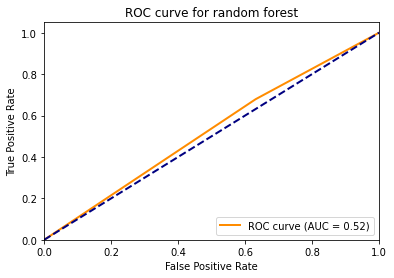

ROC for logistic regression: 0.5432098765432098 
Accuracy for logistic regression: 0.5797101449275363


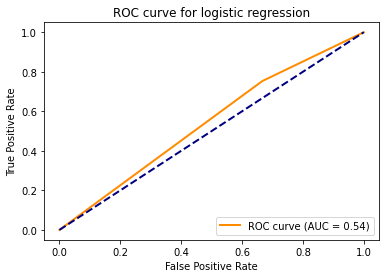

In [396]:
pca_info = PCA(n_components=5)
X_info = pca_info.fit_transform(info_m)


#cross validation for random forest and logistic regression
info_train, info_test, poli_train, poli_test = train_test_split(X_info, politics, test_size=0.5, random_state=N_Number)

#random forest
numTrees = 100
clf = RandomForestClassifier(n_estimators=numTrees).fit(info_train,poli_train) 
poli_forest=clf.predict(info_test)

accuracy_forest = accuracy_score(poli_test,poli_forest)
false_positive,true_positive,thresholds=roc_curve(poli_test,poli_forest)
roc_forest=auc(false_positive,true_positive)

print("ROC for random forest:",roc_forest,"\nAccuracy for random forest:",accuracy_forest)

plt.plot(false_positive,true_positive, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_forest)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for random forest')
plt.legend(loc="lower right")
plt.show()


#logistic
model = LogisticRegression(max_iter=1000)
model.fit(info_train, poli_train)

poli_lr = model.predict(info_test)

#calculate accurary
accuracy_lr = accuracy_score(poli_test,poli_lr)

#calculate roc curve
false_positive1,true_positive1,thresholds=roc_curve(poli_test,poli_lr)
roc_lr=auc(false_positive1,true_positive1)
print("ROC for logistic regression:",roc_lr ,"\nAccuracy for logistic regression:",accuracy_lr)

#plot the roc curve
plt.plot(false_positive1,true_positive1, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for logistic regression')
plt.legend(loc="lower right")
plt.show()
